In [4]:
import pandas as pd
import numpy as np
from pandas import Series
dfTB = pd.read_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/TrainBeverage.csv")
#series = Series.from_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/Zip_Zhvi_SingleFamilyResidence")
#print(dfTB.describe())
#list(series.columns.values)
#print(dfTB.head())

datax = dfTB.loc[dfTB['Dept'] == 95]
datax['Date'] = pd.to_datetime(datax['Date'])

gbAggregate = datax.groupby(['Date'])
#Sum and 
gbAggregatex = gbAggregate.sum()
wksales = gbAggregatex['Weekly_Sales']
#print(gbAggregatex.values)
print(wksales.index)

gbStore = datax.groupby(['Store'])






DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)


/Users/kenmckee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


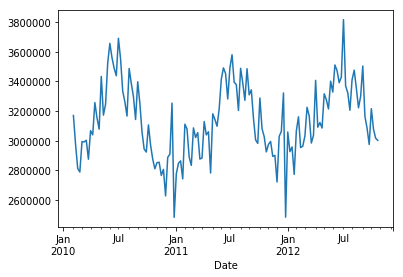

In [5]:
from matplotlib import pyplot
len(wksales)
wksales.plot()
pyplot.show()



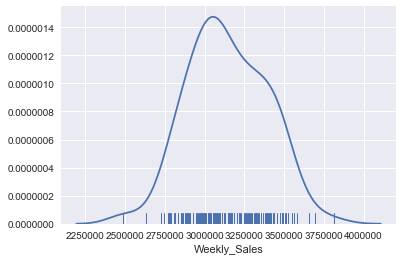

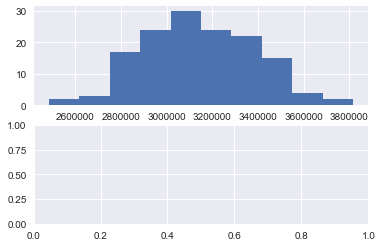

In [17]:
import seaborn as sns
sns.set(color_codes=True)

sns.distplot(wksales, hist=False, rug=True);
pyplot.show()

pyplot.figure(1)
pyplot.subplot(211)
wksales.hist()
pyplot.subplot(212)
#Series.plot.kde(213)
#pyplot.show()

ADF Statistic: -4.006419
p-value: 0.001377
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


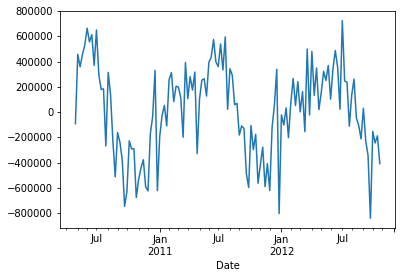

In [114]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
X = wksales.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = wksales.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

In [115]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

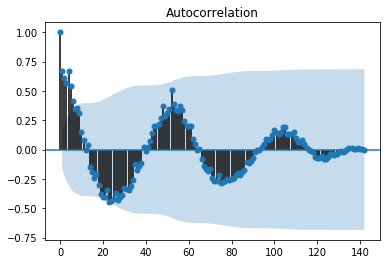

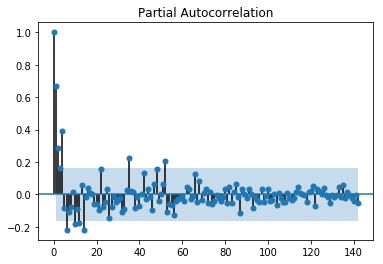

In [113]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



plot_acf(wksales, ax=pyplot.gca())
pyplot.show()

#pyplot.subplot(212)

plot_pacf(wksales, ax=pyplot.gca())
pyplot.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1901.247
Method:                       css-mle   S.D. of innovations         157339.348
Date:                Sun, 13 May 2018   AIC                           3816.493
Time:                        16:37:49   BIC                           3837.184
Sample:                    02-12-2010   HQIC                          3824.901
                         - 10-26-2012                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1182.4835   6905.445     -0.171      0.864   -1.47e+04    1.24e+04
ar.L1.D.Weekly_Sales    -0.6036      0.083     -7.295      0.000      -0.766      -0.441
ar.L2.D.Week

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


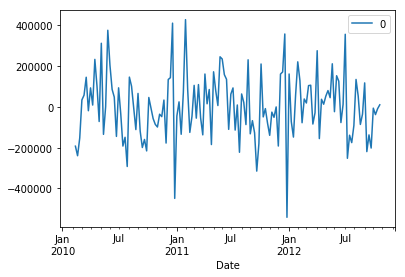

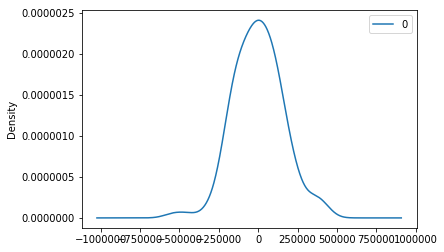

                   0
count     142.000000
mean      631.416576
std    158680.628252
min   -541124.767277
25%   -111617.902517
50%      -665.234193
75%    100184.712796
max    425910.464934


In [120]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

#First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

model = ARIMA(wksales, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=2896682.180836, expected=2902107.280000
predicted=2908540.090221, expected=2722229.420000
predicted=2839411.730635, expected=3030198.730000
predicted=2909786.910017, expected=3062988.390000
predicted=2976577.985811, expected=3322448.680000
predicted=3082925.755772, expected=2485110.930000
predicted=2862884.445683, expected=3059249.380000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=2967352.645416, expected=2926984.660000
predicted=3140261.684257, expected=2958740.810000
predicted=2734034.834731, expected=2773665.300000
predicted=2835444.946175, expected=3066161.290000
predicted=2999358.317459, expected=3161814.720000
predicted=3043388.798380, expected=2954428.450000
predicted=2927527.279002, expected=2963563.820000
predicted=3011739.697640, expected=3032242.470000
predicted=3108449.611270, expected=3225771.060000
predicted=3066894.549401, expected=3168037.250000
predicted=3079180.629787, expected=2984946.760000
predicted=3062772.745008, expected=3036695.240000
predicted=3127119.522326, expected=3407441.810000
predicted=3252195.960798, expected=3091855.680000
predicted=3089414.897704, expected=3123172.360000
predicted=3080417.499693, expected=3086089.080000
predicted=3262172.035503, expected=3316988.190000
predicted=3195060.921991, expected=3277276.460000
predicted=3176749.274892, expected=3214710.860000
predicted=3194232.342243, expected=3401920.360000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3427632.836143, expected=3430442.530000
predicted=3467233.656326, expected=3816877.210000
predicted=3627355.624749, expected=3369422.070000
predicted=3475855.122851, expected=3323364.740000
predicted=3408501.365785, expected=3205849.610000
predicted=3513899.001043, expected=3411164.170000
predicted=3343914.492392, expected=3476366.050000
predicted=3314994.331677, expected=3355095.740000
predicted=3316662.639247, expected=3222483.330000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3339032.619295, expected=3299120.930000
predicted=3389128.302543, expected=3504054.600000
predicted=3392207.358887, expected=3164634.800000


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3233868.292183, expected=3084955.100000
predicted=3185931.487368, expected=2975247.210000
predicted=3223904.154848, expected=3216723.390000
predicted=3122708.161122, expected=3078724.620000
predicted=3029066.635936, expected=3017913.920000
predicted=2993415.017608, expected=3002617.270000
Test MSE: 28580034591.481


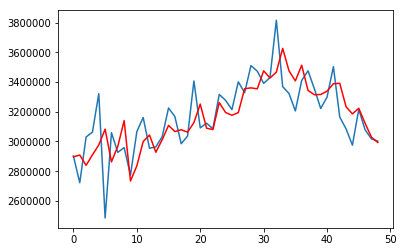

In [121]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 

X = wksales.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()